In [53]:
#NLTK libraries
import numpy as np
import pandas as pd
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from imblearn.over_sampling import SMOTE
# Machine Learning libraries
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries

from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

In [54]:
reviews = pd.read_csv('Musical_instruments_reviews.csv')
print('Amazon Reviews for sentiment Analysis Dataset:')
reviews

Amazon Reviews for sentiment Analysis Dataset:


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [55]:
#Checking for null values
print('The null values in the dataset:')
reviews.isnull().sum()

The null values in the dataset:


,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,7
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [56]:
reviews['reviewText'] = reviews['reviewText'].fillna('Missing')

In [57]:
reviews.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [58]:
print('The distribution of categories of sentiment:')
reviews['overall'].value_counts()

The distribution of categories of sentiment:


,count
overall,
5.0,6938
4.0,2084
3.0,772
2.0,250
1.0,217


In [59]:
reviews['reviews'] = reviews['reviewText'] + reviews['summary']
reviews = reviews.drop(['reviewText', 'summary'], axis=1)
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [60]:
def sent(rating):
    if rating['overall'] == 3:
        value = 'Neutral'
    elif rating['overall'] > 3:
        value = 'Positive'
    else:
        value = 'Negative'
    return value

In [61]:
#Applying the function in our new column
reviews['Sentiment'] = reviews.apply(sent, axis=1)
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,Sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


In [62]:
print('The count of sentiments:')
reviews['Sentiment'].value_counts()

The count of sentiments:


,count
Sentiment,
Positive,9022
Neutral,772
Negative,467


In [63]:
# Splitting the date
re_new = reviews["reviewTime"].str.split(",", n = 1, expand = True)

# adding month to the main dataset
reviews["date"] = re_new[0]

# adding day to the main dataset
reviews["year"] = re_new[1]

re_new1 = reviews["date"].str.split(" ", n = 1, expand = True)

# adding month to the main dataset
reviews["month"] = re_new1[0]

# adding day to the main dataset
reviews["day"] = re_new1[1]

reviews = reviews.drop(['reviewTime', 'date'], axis=1)
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviews,Sentiment,year,month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,Positive,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,Positive,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,Positive,2014,02,21


In [64]:
print('The year - wise count of reviews:')
reviews['year'].value_counts()

The year - wise count of reviews:


,count
year,
2013,4055
2014,2679
2012,1936
2011,1007
2010,350
2009,128
2008,63
2007,22
2006,10


In [65]:
newreview = reviews["helpful"].str.split(",", n = 1, expand = True)
newreview1 = newreview[0].str.split("[", n = 1, expand = True)
newreview2 = newreview[1].str.split("]", n = 1, expand = True)

#Resetting the index
newreview1.reset_index(drop=True, inplace=True)
newreview2.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting
newreview1 = newreview1.drop([0], axis=1)
newreview2 = newreview2.drop([1], axis=1)

#Concatenating the splitted columns
helpfulreview = pd.concat([newreview1, newreview2], axis=1)
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviews,Sentiment,year,month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,Positive,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,Positive,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,Positive,2014,02,21


In [66]:
#Converting into integer types
helpfulreview[0] = helpfulreview[0].astype(str).astype(int)
helpfulreview[1] = helpfulreview[1].astype(str).astype(int)

#Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those errors
try:
  helpfulreview['result'] = helpfulreview[1]/helpfulreview[0]
except ZeroDivisionError:
  helpfulreview['result']=0

#Filling the NaN values(created due to dividing) with 0
helpfulreview['result'] = helpfulreview['result'].fillna(0)

#Rounding of the results to two decimal places
helpfulreview['result'] = helpfulreview['result'].round(2)

#Attaching the results to a new column of the main dataframe
reviews['helpful_review'] = helpfulreview['result']

#dropping the helpful column from main dataframe
reviews = reviews.drop(['helpful'], axis=1)
reviews.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviews,Sentiment,year,month,day,helpful_review
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,Jake,5.0,1363392000,The product does exactly as it should and is q...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",5.0,1377648000,The primary job of this device is to block the...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,5.0,1392940800,This pop filter is great. It looks and perform...,Positive,2014,02,21,0.00


In [67]:
def clean_review(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

reviews['reviews'] = reviews['reviews'].apply(lambda x: clean_review(x))
reviews.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviews,Sentiment,year,month,day,helpful_review
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",5.0,1393545600,not much to write about here but it does exact...,Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,Jake,5.0,1363392000,the product does exactly as it should and is q...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",5.0,1377648000,the primary job of this device is to block the...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",5.0,1392336000,nice windscreen protects my mxl mic and preven...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,5.0,1392940800,this pop filter is great it looks and performs...,Positive,2014,02,21,0.00


In [68]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each',
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above',
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't",
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from',
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs',
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [69]:
reviews['reviews'] = reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
reviews.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviews,Sentiment,year,month,day,helpful_review
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",5.0,1393545600,not much write but exactly supposed filters po...,Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,Jake,5.0,1363392000,product exactly quite affordablei not realized...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",5.0,1377648000,primary job device block breath would otherwis...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",5.0,1392336000,nice windscreen protects mxl mic prevents pops...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,5.0,1392940800,pop filter great looks performs like studio fi...,Positive,2014,02,21,0.00


In [70]:
reviews['polarity'] = reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
reviews['review_len'] = reviews['reviews'].astype(str).apply(len)
reviews['word_count'] = reviews['reviews'].apply(lambda x: len(str(x).split()))
reviews.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviews,Sentiment,year,month,day,helpful_review,polarity,review_len,word_count
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",5.0,1393545600,not much write but exactly supposed filters po...,Positive,2014,02,28,0.00,0.250000,162,25
1,A14VAT5EAX3D9S,1384719342,Jake,5.0,1363392000,product exactly quite affordablei not realized...,Positive,2013,03,16,0.93,0.014286,356,55
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",5.0,1377648000,primary job device block breath would otherwis...,Positive,2013,08,28,1.00,0.167500,315,48
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",5.0,1392336000,nice windscreen protects mxl mic prevents pops...,Positive,2014,02,14,0.00,0.333333,169,22
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,5.0,1392940800,pop filter great looks performs like studio fi...,Positive,2014,02,21,0.00,0.800000,136,21


In [71]:
#Filtering data
positive_review = reviews[reviews["Sentiment"]=='Positive'].dropna()
neutral_review = reviews[reviews["Sentiment"]=='Neutral'].dropna()
negative_review = reviews[reviews["Sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [72]:
negative_review

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviews,Sentiment,year,month,day,helpful_review,polarity,review_len,word_count
15,A2PD27UKAD3Q00,B00005ML71,"Wilhelmina Zeitgeist ""coolartsybabe""",2.0,1376697600,bought use keyboard wasnt really aware options...,Negative,2013,08,17,0.0,0.269444,430,63
50,A12ABV9NU02O29,B000068NW5,C. Longo,2.0,1309910400,didnt expect cable thin easily thickness guita...,Negative,2011,07,6,1.0,-0.018707,281,41
52,A1L7M2JXN4EZCR,B000068NW5,David G,1.0,1391904000,hums crackles think im problems equipment soon...,Negative,2014,02,9,0.0,0.600000,183,29
89,A3UD50M7M72150,B000068NW5,synthezatory,1.0,1394755200,im procheapo hated thing theyre noisy cables f...,Negative,2014,03,14,0.0,-0.250000,106,16
98,A1W3CEEQBJ4GTN,B000068NZC,S. Marchuk,2.0,1379289600,bought canon vixia hf video camera shotgun mic...,Negative,2013,09,16,0.0,0.073413,620,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,A2Y2U697SS98E1,B00F2PKRJW,"John Wade Long Jr. ""LongJnSilver""",1.0,1402531200,really wanted like but theyre frickin lintcatc...,Negative,2014,06,12,0.0,0.051623,225,36
10178,A768OB1LNE356,B00FXKIG5I,"Kevin ""k""",2.0,1395446400,larger ones sometimes neck snap thought might ...,Negative,2014,03,22,0.5,-0.058333,277,44
10187,A3AOPVQ7EZHTWA,B00GTSM8FW,"frankp93 ""frankp93""",2.0,1398297600,tension screw adjustment remains best capo ive...,Negative,2014,04,24,0.0,0.203853,1467,211
10189,A1SD1C8XK3Z3V1,B00GTSM8FW,"guitfiddleblue ""guitfiddleblue""",2.0,1401667200,fan planet waves ns capos but new one not well...,Negative,2014,06,2,1.0,0.116919,339,57


In [73]:
# calling the label encoder function
le = preprocessing.LabelEncoder()

# Encode labels in column 'sentiment'.
reviews['Sentiment']= le.fit_transform(reviews['Sentiment'])

reviews['Sentiment'].unique()

array([2, 1, 0])

In [74]:
reviews['Sentiment'].value_counts()

,count
Sentiment,
2,9022
1,772
0,467


In [75]:
#Extracting 'reviews' for processing
review_features = reviews.copy()
review_features = review_features[['reviews']].reset_index(drop=True)
review_features.head()

,reviews
0,not much write but exactly supposed filters po...
1,product exactly quite affordablei not realized...
2,primary job device block breath would otherwis...
3,nice windscreen protects mxl mic prevents pops...
4,pop filter great looks performs like studio fi...


In [76]:
tfidf_vectorizer = TfidfVectorizer(max_features = 5000, ngram_range = (2,2))
# TF-IDF feature matrix
X = tfidf_vectorizer.fit_transform(review_features['reviews'])
X.shape

(10261, 5000)

In [77]:
#Getting the target variable(encoded)
y = reviews['Sentiment']
y.shape

(10261,)

In [78]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_resampled)}')

Original dataset shape : Counter({2: 9022, 1: 772, 0: 467})
Resampled dataset shape Counter({2: 9022, 1: 9022, 0: 9022})


In [79]:
## Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=0)

In [80]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [81]:
logreg = LogisticRegression(C = 6866.498, random_state = 0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


Confusion matrix, without normalization


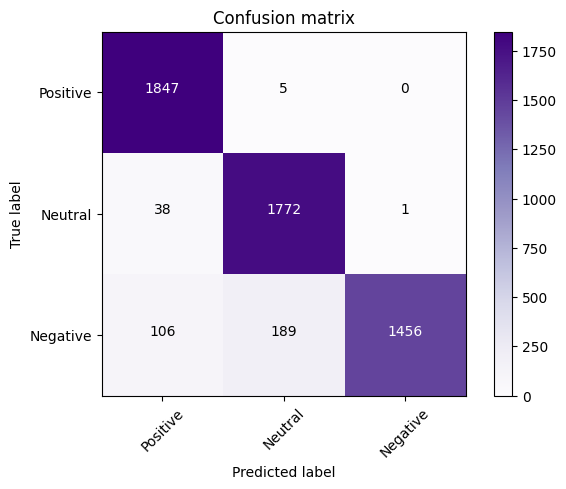

In [82]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

In [83]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1852
           1       0.90      0.98      0.94      1811
           2       1.00      0.83      0.91      1751

    accuracy                           0.94      5414
   macro avg       0.94      0.94      0.94      5414
weighted avg       0.94      0.94      0.94      5414

